## Importing necessary libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [0]:
!pip install chart_studio

#### Chart studio helps to embed interactive plotly graphs in platforms outside jupyter

In [0]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

- Setting up the credentials from Plotly

In [0]:
tls.set_credentials_file(username='IshaGulati',api_key='Kk4iDM0uYjM8PuTV2I20')

#### Text preprocessing libraries

In [0]:
!pip install unidecode

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch
import re
import string
import codecs
import unidecode


import warnings
warnings.filterwarnings("ignore")


### Function to generate random colours
#### Can be used by passing number of colours needed

In [0]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [0]:
train_data = pd.read_csv('train.csv',encoding='utf-8')

In [0]:
test_data = pd.read_csv('test.csv',encoding='utf-8')

In [0]:
test_data.shape

(1819, 2)

In [0]:
train_data['sentiment'].value_counts()

1    4311
2    2382
0    456 
3    125 
Name: sentiment, dtype: int64

In [0]:
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                             tweet  \
0  #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                         
1  Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}              
3  This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                     
4  Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                     

   sentiment  
0  1          
1  1          
2  2          
3  0          
4  1

In [0]:
train_data.loc[0:15,'tweet']

0     #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                      
1     Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw
2     one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}           
3     This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                  
4     Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                  
5     #technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech                            
6     SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad          

In [0]:
train_data.shape

(7274, 3)

In [0]:
test_data.isnull().sum()

tweet_id    0
tweet       0
dtype: int64

In [0]:
train_data.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

- We will remove the only null row present

In [0]:
train_data[train_data.isnull().any(axis=1)]

tweet_id tweet  sentiment
1274  6         NaN   1

In [0]:
train_data.dropna(inplace=True)

In [0]:
train_data.shape

(7273, 3)

In [0]:
# train_data = train_data.sample(frac=1).reset_index(drop=True)

In [0]:
train_data.describe()

tweet_id    sentiment
count  7273.000000  7273.000000
mean   4532.359137  1.299189   
std    2617.500684  0.607861   
min    2.000000     0.000000   
25%    2263.000000  1.000000   
50%    4531.000000  1.000000   
75%    6797.000000  2.000000   
max    9092.000000  3.000000

## Adding Sentiment text for better visualizations
### We have done dictionary mapping to reflect the textual meaning of the sentiment classes
* 0: Negative
* 1: Neutral
* 2: Positive
* 3: Can't Tell

In [0]:
sentiment_dict = {0:'Negative',1:'Neutral',2:'Positive',3:"""Can't tell"""}
train_data['vis_sentiment'] = train_data['sentiment'].map(sentiment_dict)
train_data.head()

tweet_id  \
0  1701       
1  1851       
2  2689       
3  4525       
4  3604       

                                                                                                                                             tweet  \
0  #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                         
1  Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2  one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}              
3  This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                     
4  Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                     

   sentiment vis_sentiment  
0  1          Neutral       
1  1          Neutral       
2  2          Positive      
3  0          Negative      
4  1          Neutral

In [0]:
temp_vis = train_data.groupby('vis_sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp_vis.style.background_gradient(cmap='Blues')

### Univariate Analysis of the Sentiment Data

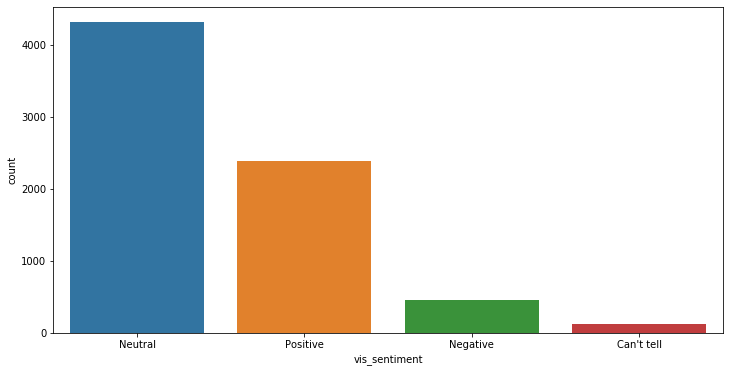

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(x='vis_sentiment',data=train_data)

In [0]:
funnel = go.Figure(go.Funnelarea(
    text =temp_vis.vis_sentiment,
    values = temp_vis.tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
funnel.show()

- We see that more than half of the tweets are classified as Neutral tweets
- Less than 10% of tweets are in the negative and can't tell categories

### Bivariate Analysis
- Character Counts for Positive and Negative tweets

### BeautifulSoup - Decoding html to general text, will replace &amp and &quot to  & and " ", etc

In [0]:
from bs4 import BeautifulSoup
def remove_html_encodings(x):
    example1 = BeautifulSoup(x, 'lxml')
    return example1.get_text()

In [0]:
train_data["tweet"] = train_data["tweet"].apply(lambda x: remove_html_encodings(x))

In [0]:
train_data.head(20)

tweet_id  \
0   1701       
1   1851       
2   2689       
3   4525       
4   3604       
5   966        
6   1395       
7   8182       
8   8835       
9   883        
10  6398       
11  2369       
12  3944       
13  6909       
14  7917       
15  5849       
16  1955       
17  1472       
18  4730       
19  2166       

                                                                                                                                          tweet  \
0   #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller                                                     
1   Learning ab Google doodles! All doodles should be light, funny & innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw   
2   one of the most in-your-face ex. of stealing the show in yrs RT @mention "At #SXSW, Apple schools the mkt experts"  {link}                    
3   This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork                 
4   Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}                                                                 
5   #technews One lone dude awaits iPad 2 at AppleÛªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech                           
6   SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad                                                          
7   NU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable                       
8   Free #SXSW sampler on iTunes {link} #FreeMusic                                                                                                
9   I think I might go all weekend without seeing the same iPad case twice... #sxsw                                                               
10  RT @mention Official #SXSW App Û÷SXSW GOÛª bit.ly/hmiiGa #android #iphone #ipad                                                             
11  It's official! I'm buying an iPad. #SXSW #elevate                                                                                             
12  They're giving away iPad 2's, x boxes and books at @mention #sxsw #techenvy                                                                   
13  RT @mention We're officially at #SXSW! Come by the @mention Grill, mention us w/ #zazzlsxsw and youÛªll get to make your own iPhone case!    
14  #Companies to watch, from the #SXSW trade show floor {link} #apps #features #hardware #ipad #iphone                                           
15  RT @mention Google Marissa Mayer, future of location: augmented reality, contextual discovery, make smartphones smarter. #sxsw                
16  DL the #Calyp App to get into #Calyp Casa at #SXSW the free mobile app is available in iTunes App Store & Android Market. See u there!        
17  Well yeah.  Music > iPhone nerds RT @mention my god, cute girls everywhere...I love when interactive ends and music begins #sxsw              
18  Apple Opens Pop Up Store at SXSW {link} via @mention #apple #iPad2 #technology #iTunes #SXSW                                                  
19  @mention atleast you are at #sxsw. I'm not there AND I have no Ipad. #doubleloser                                                             

    sentiment  
0   1          
1   1          
2   2          
3   0          
4   1          
5   1          
6   1          
7   1          
8   2          
9   2          
10  3          
11  2          
12  2          
13  1          
14  1          
15  1          
16  1          
17  2          
18  1          
19  1

In [0]:
test_data['tweet'] = test_data['tweet'].apply(lambda x: remove_html_encodings(x))

### Removing all tweets with labels 'Can't tell' - we don't want our model to predict that "it cannot tell" the sentiment of the tweet

In [0]:
train_data = train_data[train_data['sentiment'] != 3]

In [0]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# SadEmoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

def check_emoticon(txt):
  all_text=[]
  txt1 = str(txt).split()
  for t in txt1:
    for happy in emoticons_happy:
      if t == happy:
        all_text.append("happy")    
    for sad in emoticons_sad:
      if t == sad:
        all_text.append("sad")  
    else:
        all_text.append(txt1)

  result = ' '.join(all_text[0])

  return result

train_data.tweet = train_data.tweet.apply(lambda x: check_emoticon(x))
test_data.tweet = test_data.tweet.apply(lambda x: check_emoticon(x))



In [0]:
train_data.shape

(7148, 3)

### Gensim's simple_preprocess library for basic cleaning of the data

In [0]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
train_data['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in train_data['tweet']] 
print(train_data['tokenized_text'].head(10))

0    [sxswnui, sxsw, apple, defining, language, of, touch, with, different, dialects, becoming, smaller]                                                   
1    [learning, ab, google, doodles, all, doodles, should, be, light, funny, innovative, with, exceptions, for, significant, occasions, googledoodle, sxsw]
2    [one, of, the, most, in, your, face, ex, of, stealing, the, show, in, yrs, rt, mention, at, sxsw, apple, schools, the, mkt, experts, link]            
3    [this, iphone, sxsw, app, would, pretty, awesome, if, it, didn, crash, every, mins, during, extended, browsing, fuckit, illmakeitwork]                
4    [line, outside, the, apple, store, in, austin, waiting, for, the, new, ipad, sxsw, link]                                                              
5    [technews, one, lone, dude, awaits, ipad, at, apple, uªs, sxsw, store, link, tech_news, apple, ipad_, sxsw, tablets, tech]                            
6    [sxsw, tips, prince, npr, videos, toy, shopping, with, zuck

In [0]:
test_data['tokenized_text'] = [simple_preprocess(line,deacc=True) for line in test_data['tweet']]
print(test_data['tokenized_text'].head(10))

0    [audience, what, prototyping, tools, do, you, use, sketchbooks, sharpie, pens, photoshop, balsamic, google, docs, axsure, etc, myprototype, sxsw]       
1    [at, sxsw, send, your, best, photos, videos, to, link, cnn, ireport, photography, sxsw, cyber, iphone]                                                  
2    [mention, and, here, pic, of, you, winning, your, ipad, unsix, sxsw, cc, mention, mention, link, cont, link]                                            
3    [google, marissa, mayer, mobile, phone, as, cursor, of, physical, location, new, version, of, map, fast, and, more, real, life, like, sxsw]             
4    [sxsw, google, maps, is, even, cooler, than, thought]                                                                                                   
5    [rt, mention, in, front, of, mention, popup, store, at, sxsw, last, night, link]                                                                        
6    [rt, mention, in, my, next, life, coming, back,

In [0]:
# import packages
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('wordnet')


# stop_words = stopwords.words('english')
# add_stopwords = ['ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'mightn',"mightn't",'not']
# for i in add_stopwords :
#     stop_words.remove(i)
# custom = stop_words+list(punctuation)+list('#sxsw')

# train_data['tokenized_data'] = train_data['tokenized_data'].apply(lambda row: [word for word in row if word not in custom])
 # # train_data['tokenized_data'] = train_data['tokenized_data'].apply(lambda row: [])
# test_data['tokenized_data'] = test_data['tokenized_data'].apply(lambda row: [word for word in row if word not in custom])

porter = PorterStemmer()
lemmatizer =  WordNetLemmatizer()
# stemming words
# stemmer = PorterStemmer()
corpus = []
train_data['tokenized_text'] = train_data['tokenized_text'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])
train_data['tokenized_text'] = train_data['tokenized_text'].apply(lambda x:[porter.stem(i) for i in x])

train_data['tokenized_text'] = train_data['tokenized_text'].apply(lambda x:' '.join(x))
for i in train_data.tokenized_text:
    corpus.append(i)
print(corpus)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['sxswnui sxsw appl defin languag of touch with differ dialect becom smaller', 'learn ab googl doodl all doodl should be light funni innov with except for signific occas googledoodl sxsw', 'one of the most in your face ex of steal the show in yr rt mention at sxsw appl school the mkt expert link', 'thi iphon sxsw app would pretti awesom if it didn crash everi min dure extend brows fuckit illmakeitwork', 'line outsid the appl store in austin wait for the new ipad sxsw link', 'technew one lone dude await ipad at appl uª sxsw store link tech_new appl ipad_ sxsw tablet tech', 'sxsw tip princ npr video toy shop with zuckerberg link sxsw ipad', 'nu user rt mention new ubersoci for iphon now in the app store includ uberguid to sxsw sponsor by mashabl', 'free sxsw sampler on itun link freemus', 'think might go all weekend without see the same ipad case twice sxsw', 'it offici buy 

In [0]:
test_data['tokenized_text'] = test_data['tokenized_text'].apply(lambda x:[lemmatizer.lemmatize(i) for i in x])
test_data['tokenized_text'] = test_data['tokenized_text'].apply(lambda x:[porter.stem(i) for i in x])

test_data['tokenized_text'] = test_data['tokenized_text'].apply(lambda x:' '.join(x))

# train_data.head(20)

In [0]:
train_data.shape

(7148, 4)

### Adding polairty as a feature

In [0]:
from textblob import TextBlob
# Creating Polarity Column using TextBlob
tb_polarity = []
for sentence in train_data['tokenized_text']:
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])
train_data['polarity'] = tb_polarity

test_polarity =[]
for sentence in test_data['tokenized_text']:
    temp = TextBlob(sentence)
    test_polarity.append(temp.sentiment[0])
# print(tb_polarity)
test_data['polarity'] = test_polarity

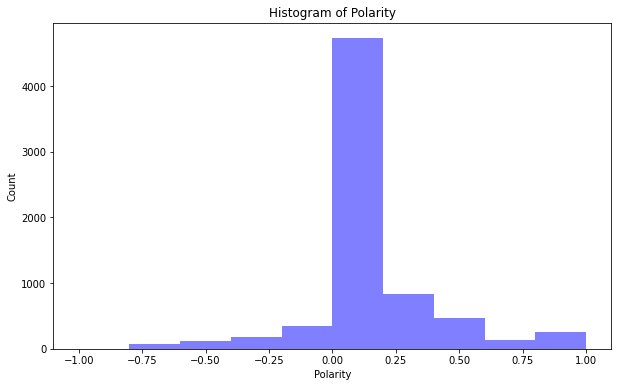

In [0]:
num_bins = 10
plt.figure(figsize=(10,6))
n,bins,patches = plt.hist(train_data['polarity'],num_bins,facecolor='blue',alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show()

In [0]:
# Creating Subjectivity Column using Textblob

def sentiment_subjectivity(text):
  doc = TextBlob(text)
  return doc.sentiment.subjectivity

train_data["subjectivity"] = train_data["tokenized_text"].apply(lambda x :  sentiment_subjectivity(x))
test_data["subjectivity"] = test_data["tokenized_text"].apply(lambda x :  sentiment_subjectivity(x))

## Topic Modelling

In [0]:
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [0]:
cleaned_doc = train_data['tokenized_text'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(cleaned_doc)
doc_term_matrix = [dictionary.doc2bow(tweets) for tweets in cleaned_doc]
print(cleaned_doc)
print(doc_term_matrix)

0       [sxswnui, sxsw, appl, defin, languag, of, touch, with, differ, dialect, becom, smaller]                                                 
1       [learn, ab, googl, doodl, all, doodl, should, be, light, funni, innov, with, except, for, signific, occas, googledoodl, sxsw]           
2       [one, of, the, most, in, your, face, ex, of, steal, the, show, in, yr, rt, mention, at, sxsw, appl, school, the, mkt, expert, link]     
3       [thi, iphon, sxsw, app, would, pretti, awesom, if, it, didn, crash, everi, min, dure, extend, brows, fuckit, illmakeitwork]             
4       [line, outsid, the, appl, store, in, austin, wait, for, the, new, ipad, sxsw, link]                                                     
                                               ...                                                                                              
7269    [mention, googl, plze, tammi, in, middl, of, sxsw, crazi, and, everyth, is, soooooo, busi]                                

In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=3, 
                                           random_state=42,
                                           update_every=1,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [0]:
pprint(lda_model.print_topics())

[(0,
  '0.057*"sxsw" + 0.051*"mention" + 0.030*"to" + 0.027*"link" + 0.021*"rt" + '
  '0.020*"googl" + 0.018*"at" + 0.018*"the" + 0.017*"iphon" + 0.017*"you"'),
 (1,
  '0.060*"sxsw" + 0.038*"googl" + 0.037*"mention" + 0.029*"the" + 0.020*"link" '
  '+ 0.020*"of" + 0.014*"rt" + 0.014*"and" + 0.013*"at" + 0.012*"is"'),
 (2,
  '0.062*"sxsw" + 0.043*"mention" + 0.037*"the" + 0.036*"appl" + 0.033*"ipad" '
  '+ 0.030*"link" + 0.026*"in" + 0.026*"for" + 0.024*"store" + 0.024*"at"')]


In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

  """
  Compute c_v coherence for various number of topics

  Parameters:
  ----------
  dictionary : Gensim dictionary
  corpus : Gensim corpus
  texts : List of input texts
  limit : Max num of topics

  Returns:
  -------
  model_list : List of LDA topic models
  coherence_values : Coherence values corresponding to the LDA model with respective number of topics
  """
  coherence_values = []
  model_list = []
  for num_topics in range(start, limit, step):
    Lda = gensim.models.ldamodel.LdaModel
    model = Lda(corpus, num_topics, id2word = dictionary, passes=20)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

  return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=cleaned_doc, start=2, limit=30, step=2)

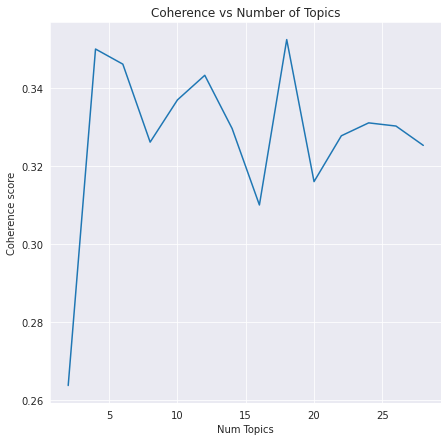

In [0]:

import seaborn as sns

limit=30; start=2; step=2;
x = range(start, limit, step)

# Setting the plotting area
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(x, coherence_values)

# Labelling the axes
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence vs Number of Topics")
plt.show()

### From the above coherence graph, we can see that there is drop in coherence after topic number 3,12 and 17 so will consider 10 as the optimal topic number(approximate average)

In [0]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3229
Num Topics = 4  has Coherence Value of 0.3886
Num Topics = 6  has Coherence Value of 0.2874
Num Topics = 8  has Coherence Value of 0.3449
Num Topics = 10  has Coherence Value of 0.3281
Num Topics = 12  has Coherence Value of 0.3217
Num Topics = 14  has Coherence Value of 0.3613
Num Topics = 16  has Coherence Value of 0.3499
Num Topics = 18  has Coherence Value of 0.3327
Num Topics = 20  has Coherence Value of 0.3401
Num Topics = 22  has Coherence Value of 0.3373
Num Topics = 24  has Coherence Value of 0.3105
Num Topics = 26  has Coherence Value of 0.3175
Num Topics = 28  has Coherence Value of 0.3316


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=42,
                                           update_every=1,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [0]:
!pip install pyLDAvis

In [0]:
#topivc num =8
import pyLDAvis
import pyLDAvis.gensim 

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.save_html(vis, 'lda.html')
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.011017 -0.113480  1       1        25.815237
4     -0.099334  0.161185  2       1        15.269063
6      0.253630  0.093119  3       1        12.593940
1      0.106221 -0.068513  4       1        11.716582
2     -0.069603 -0.000022  5       1        10.228902
7     -0.031220 -0.124409  6       1        10.121306
5     -0.063389 -0.046577  7       1        8.369944 
3     -0.085288  0.098696  8       1        5.885028 , topic_info=      Term         Freq        Total Category  logprob  loglift
0    appl   1726.000000  1726.000000  Default  30.0000  30.0000
19   googl  2002.000000  2002.000000  Default  29.0000  29.0000
66   store  1147.000000  1147.000000  Default  28.0000  28.0000
32   link   3224.000000  3224.000000  Default  27.0000  27.0000
62   ipad   2286.000000  2286.000000  Default  26.0000  26.0000
..    ...           ...          ...      ...      ...      ...
153  is     51.031464    1275.942993  Topic8  -4.9387  -0.3862 
97   on     48.836296    990.926819   Topic8  -4.9827  -0.1774 
217  about  40.858601    315.388733   Topic8  -5.1611   0.7891 
59   thi    41.846607    448.854248   Topic8  -5.1372   0.4601 
27   at     41.784115    2328.987305  Topic8  -5.1387  -1.1879 

[541 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
469   1      0.712102  a   
469   4      0.056716  a   
469   5      0.056716  a   
469   6      0.069320  a   
469   7      0.006302  a   
...  ..           ... ..   
42    1      0.426291  your
42    3      0.092798  your
42    5      0.049299  your
42    6      0.397291  your
42    7      0.028999  your

[823 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 7, 2, 3, 8, 6, 4])

In [0]:
def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=cleaned_doc):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = row[0] if lda_model.per_word_topics else row
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df.index = contents.index
    sent_topics_df['text'] = contents
    # sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=cleaned_doc)

# Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
df_topic_sents_keywords.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_topic_sents_keywords.head()

Dominant_Topic  Topic_Perc_Contrib  \
0  2.0             0.4207               
1  1.0             0.6530               
2  0.0             0.7570               
3  2.0             0.3905               
4  4.0             0.6127               

                                                  Keywords  \
0  sxsw, mention, ipad, to, the, in, for, link, rt, app      
1  googl, sxsw, mention, of, the, and, rt, link, map, is     
2  sxsw, the, mention, to, you, ipad, at, iphon, my, is      
3  sxsw, mention, ipad, to, the, in, for, link, rt, app      
4  appl, sxsw, store, the, up, link, mention, ipad, in, at   

                                                                                                                                  Text  
0  [sxswnui, sxsw, appl, defin, languag, of, touch, with, differ, dialect, becom, smaller]                                              
1  [learn, ab, googl, doodl, all, doodl, should, be, light, funni, innov, with, except, for, signific, occas, googledoodl, sxsw]        
2  [one, of, the, most, in, your, face, ex, of, steal, the, show, in, yr, rt, mention, at, sxsw, appl, school, the, mkt, expert, link]  
3  [thi, iphon, sxsw, app, would, pretti, awesom, if, it, didn, crash, everi, min, dure, extend, brows, fuckit, illmakeitwork]          
4  [line, outsid, the, appl, store, in, austin, wait, for, the, new, ipad, sxsw, link]

In [0]:
df_topic_sents_keywords.index = train_data.index
train_data['Dominant_Topic'] = df_topic_sents_keywords['Dominant_Topic']

In [0]:
df_topic_sents_keywords['Dominant_Topic'].value_counts()

0.0    2020
4.0    1252
6.0    815 
1.0    799 
7.0    676 
2.0    619 
5.0    564 
3.0    403 
Name: Dominant_Topic, dtype: int64

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tweets_train = tfidf_vectorizer.fit_transform(train_data['tokenized_text'])

In [0]:
tweets_test = tfidf_vectorizer.transform(test_data['tokenized_text'])

In [0]:
X=tweets_train.toarray()
X = pd.DataFrame(X)

X.index = train_data.index

X['polarity'] = train_data['polarity']
# X['subjectivity'] = train_data['subjectivity']
# X['Dominant_Topic'] = train_data['Dominant_Topic']
train_data['sentiment']

0       1
1       1
2       2
3       0
4       1
       ..
7269    1
7270    1
7271    1
7272    1
7273    1
Name: sentiment, Length: 7148, dtype: int64

In [0]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



# ratio to split into training and test set
ratio = int(len(train_data)*0.75)

# logistic regression model
logreg = LogisticRegression(random_state=2) 


# split into train and test
X_train,X_val,y_train,y_val = train_test_split(X,train_data.sentiment, test_size=0.2,random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.25,random_state=22)


# fit on training data
logreg.fit(X_train,y_train)

# make predictions
prediction_test = logreg.predict(X_test)
prediction_val = logreg.predict(X_val)
# prediction_int = (prediction[:,1] >= 0.3).astype(int)

# print out accuracy
f1_test = f1_score(y_test,prediction_test,average='weighted')
f1_val = f1_score(y_val,prediction_val,average='weighted')
print("f1_score on test: ",f1_test)
print("f1_score on val: ",f1_val)

f1_score on test:  0.6450921772034485
f1_score on val:  0.6502450100149364


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Instantiate calssifier
rf = RandomForestClassifier(random_state=2)

# fit on training data
rf.fit(X_train,y_train)

# make predictions
prediction_test = rf.predict(X_test)
prediction_val = rf.predict(X_val)


# print out accuracy
f1_test = f1_score(y_test,prediction_test,average='weighted')
f1_val = f1_score(y_val,prediction_val,average='weighted')
print("f1_score on test: ",f1_test)
print("f1_score on val: ",f1_val)


f1_score on test:  0.6410690586759993
f1_score on val:  0.6351537196035932


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 10.9min finished


In [0]:
y_pred_rf_grid = gridF.predict(X_test)
score_grid_rf = f1_score(y_test,y_pred_rf_grid,average='weighted')


In [0]:
score_grid_rf

0.6240920632484956

In [0]:
# import packages
from imblearn.over_sampling import SMOTE

# Instantiate smote
smote = SMOTE(random_state=9)

# fit_sample onm training data
X_smote,y_smote = smote.fit_sample(X_train,y_train)

# fit on training data
rf.fit(X_smote,y_smote)

# make predictions
prediction_test = rf.predict(X_test)
prediction_val = rf.predict(X_val)


# print out accuracy
f1_test = f1_score(y_test,prediction_test,average='weighted')
f1_val = f1_score(y_val,prediction_val,average='weighted')
print("f1_score on test: ",f1_test)
print("f1_score on val: ",f1_val)

f1_score on test:  0.6622045362854198
f1_score on val:  0.6434326574796686


In [0]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
gridF.fit(X_smote, y_smote)
print(gridF.best_params_)
print(gridF.best_estimator_)

rf_grid_predict = gridF.predict(X_test)
rf_grid_score = f1_score(y_test,rf_grid_predict)
print(rf_grid_score)

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from imblearn.over_sampling import SMOTE

In [0]:
# svm = LinearSVC(random_state = 42)
# svm.fit(X_train, y_train)
# y_pred = svm.predict(X_test)
# score = f1_score(y_test,y_pred,average='weighted')
# print(score)

param_grid = {'C': [0.1, 0.1,1], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(
    SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_smote, y_smote) 

print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(f1_score(y_test, grid_predictions,average='weighted')) 

In [0]:
svc_model = SVC(C=1, gamma = 1, kernel = 'rbf')
# fit on training data
svc_model.fit(X_train,y_train)

# make predictions
prediction_test = svc_model.predict(X_test)
prediction_val = svc_model.predict(X_val)


# print out accuracy
f1_test = f1_score(y_test,prediction_test,average='weighted')
f1_val = f1_score(y_val,prediction_val,average='weighted')
print("f1_score on test: ",f1_test)
print("f1_score on val: ",f1_val)

f1_score on test:  0.6585655127284789
f1_score on val:  0.6627902445568529


In [0]:
svc_model_smote = SVC(C=1, gamma = 1, kernel = 'rbf')
svc_model_smote.fit(X_smote,y_smote)

# make predictions
prediction_test = svc_model_smote.predict(X_test)
prediction_val = svc_model_smote.predict(X_val)


# print out f1_score
f1_test = f1_score(y_test,prediction_test,average='weighted')
f1_val = f1_score(y_val,prediction_val,average='weighted')
print("f1_score on test: ",f1_test)
print("f1_score on val: ",f1_val)

f1_score on test:  0.6725221650058479
f1_score on val:  0.6726357095882256


In [0]:
from sklearn.naive_bayes import MultinomialNB
nb =  MultinomialNB(alpha=0)

nb.fit(X_train,y_train)

# make predictions
prediction_test = nb.predict(X_test)
prediction_val = nb.predict(X_val)



f1_test = f1_score(y_test,prediction_test,average='weighted')
f1_val = f1_score(y_val,prediction_val,average='weighted')
print("f1_score on test: ",f1_test)
print("f1_score on val: ",f1_val)


### Test Data Modelling 

In [0]:
cleaned_doc = test_data['tokenized_text'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(cleaned_doc)
doc_term_matrix = [dictionary.doc2bow(tweets) for tweets in cleaned_doc]


In [0]:
lda_model_test = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=42,
                                           update_every=1,
                                           passes=20,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True,
                                           )

In [0]:
def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=cleaned_doc):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = row[0] if lda_model.per_word_topics else row
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df.index = contents.index
    sent_topics_df['text'] = contents
    # sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=cleaned_doc)

# Format
# df_dominant_topic = df_topic_sents_keywords.reset_index()
df_topic_sents_keywords.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_topic_sents_keywords.head()

Dominant_Topic  Topic_Perc_Contrib  \
0  1.0             0.4227               
1  0.0             0.4227               
2  0.0             0.6957               
3  2.0             0.4192               
4  0.0             0.4895               

                                                Keywords  \
0  googl, sxsw, mention, of, the, and, rt, link, map, is   
1  sxsw, the, mention, to, you, ipad, at, iphon, my, is    
2  sxsw, the, mention, to, you, ipad, at, iphon, my, is    
3  sxsw, mention, ipad, to, the, in, for, link, rt, app    
4  sxsw, the, mention, to, you, ipad, at, iphon, my, is    

                                                                                                                                  Text  
0  [audienc, what, prototyp, tool, do, you, use, sketchbook, sharpi, pen, photoshop, balsam, googl, doc, axsur, etc, myprototyp, sxsw]  
1  [at, sxsw, send, your, best, photo, video, to, link, cnn, ireport, photographi, sxsw, cyber, iphon]                                  
2  [mention, and, here, pic, of, you, win, your, ipad, unsix, sxsw, cc, mention, mention, link, cont, link]                             
3  [googl, marissa, mayer, mobil, phone, a, cursor, of, physic, locat, new, version, of, map, fast, and, more, real, life, like, sxsw]  
4  [sxsw, googl, map, is, even, cooler, than, thought]

In [0]:
df_topic_sents_keywords.index = test_data.index
test_data['Dominant_Topic'] = df_topic_sents_keywords['Dominant_Topic']

In [0]:
y_train = train_data['sentiment']

In [0]:
y=tweets_test.toarray()
y = pd.DataFrame(y)

y.index = test_data.index

y['polarity'] = test_data['polarity']
# y['subjectivity'] = test_data['subjectivity']
# y['Dominant_Topic'] = test_data['Dominant_Topic']


In [0]:
ID = test_data['tweet_id']

In [0]:
rf = RandomForestClassifier(max_depth=30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1200)
smote = SMOTE(random_state=9)
X_smote,y_smote = smote.fit_sample(X,y_train)

rf.fit(X_smote,y_smote)
y_pred_rf =rf.predict(y)

In [0]:
y_pred_rf

array([1, 1, 1, ..., 1, 2, 1])

In [0]:
submission5_10 = pd.DataFrame({
        "tweet_id": ID,
        "sentiment": y_pred_svc
    })

In [0]:
from google.colab import files
submission5_10.to_csv('submission5_10.csv',index=False)
files.download('submission5_10.csv')

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=9)
X_smote,y_smote = smote.fit_sample(X,y_train)
svc_model = SVC(C=1, gamma = 1, kernel = 'rbf')
svc_model.fit(X_smote,y_smote)
y_pred_svc = svc_model.predict(y)

In [0]:
y_pred_svc

array([1, 1, 1, ..., 1, 2, 1])

In [0]:
submission5_15 = pd.DataFrame({
        "tweet_id": ID,
        "sentiment": y_pred_svc
    })

In [0]:
from google.colab import files
submission5_15.to_csv('submission5_15.csv',index=False) 
files.download('submission5_15.csv')

#### Model Interpretability using Lime

In [0]:
! pip install lime

In [0]:
from lime import lime_text
from sklearn.pipeline import make_pipeline

c = make_pipeline(tfidf, rfc)

In [0]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=[0,1,2])

In [0]:
idx = 2
exp = explainer.explain_instance(X_new[idx], c.predict_proba, num_features=8, top_labels=3)
print("Tweet: %s" % X_new[idx])
print('True class: %s' % y_new[idx])
exp.show_in_notebook(text=True)